In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
import seaborn as sns
import joblib
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [2]:
df =  pd.read_csv('Expresso_churn_dataset.csv')
df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [4]:
df.isnull().sum()

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

In [5]:
df.drop(['TIGO','ZONE1','ZONE2'],axis=1,inplace=True)

In [6]:
df.drop('REVENUE',axis=1,inplace=True)

In [7]:
df.dropna(inplace=True)

In [8]:
cols = df.select_dtypes(include='number')
cols

,MONTANT,FREQUENCE_RECH,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,REGULARITY,FREQ_TOP_PACK,CHURN
0,4250.0,15.0,1417.0,17.0,4.0,388.0,46.0,54,8.0,0
3,13500.0,15.0,4501.0,18.0,43804.0,41.0,102.0,62,11.0,0
7,7000.0,16.0,2410.0,22.0,1601.0,77.0,29.0,55,8.0,0
11,12650.0,27.0,3957.0,36.0,8453.0,431.0,66.0,62,11.0,0
18,7600.0,46.0,2625.0,57.0,901.0,10.0,60.0,62,27.0,0
...,...,...,...,...,...,...,...,...,...,...
2154035,6350.0,15.0,1991.0,27.0,404.0,269.0,147.0,60,11.0,0
2154037,900.0,4.0,229.0,5.0,0.0,72.0,7.0,55,1.0,0
2154040,2000.0,4.0,666.0,5.0,0.0,57.0,1.0,21,2.0,0
2154042,4800.0,4.0,1600.0,14.0,7400.0,2.0,12.0,62,3.0,0


In [9]:
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)

outlier_preds = iso_forest.fit_predict(cols)

df['outlier'] = outlier_preds

df_clean = df[df['outlier'] == 1].drop(columns='outlier')

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532776 entries, 0 to 2154044
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         532776 non-null  object 
 1   REGION          532776 non-null  object 
 2   TENURE          532776 non-null  object 
 3   MONTANT         532776 non-null  float64
 4   FREQUENCE_RECH  532776 non-null  float64
 5   ARPU_SEGMENT    532776 non-null  float64
 6   FREQUENCE       532776 non-null  float64
 7   DATA_VOLUME     532776 non-null  float64
 8   ON_NET          532776 non-null  float64
 9   ORANGE          532776 non-null  float64
 10  MRG             532776 non-null  object 
 11  REGULARITY      532776 non-null  int64  
 12  TOP_PACK        532776 non-null  object 
 13  FREQ_TOP_PACK   532776 non-null  float64
 14  CHURN           532776 non-null  int64  
dtypes: float64(8), int64(2), object(5)
memory usage: 65.0+ MB


In [11]:
df_clean['CHURN'].value_counts()

CHURN
0    531644
1      1132
Name: count, dtype: int64

In [12]:
df_clean.drop('user_id',axis=1,inplace=True)

In [13]:
target = 'CHURN'
inputs = df_clean.drop(target,axis=1)

X = inputs
y = df_clean[target]

In [14]:
class_ = Counter(y)
class_

Counter({0: 531644, 1: 1132})

In [15]:
ros = RandomOverSampler(random_state=30)
X_resam,y_resam = ros.fit_resample(X,y)

In [16]:
class_over = Counter(y_resam)
class_over

Counter({0: 531644, 1: 531644})

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X_resam,y_resam,test_size=0.3,random_state=30)

In [18]:
num = []
cat = []

for i in df_clean.columns:
    if df_clean[i].dtype in ['float64', 'int64']:
        num.append(i)

for i in df_clean.columns:
    if df_clean[i].dtype == 'object':
        cat.append(i)

In [19]:
num.remove('CHURN')

In [20]:
num , cat

(['MONTANT',
  'FREQUENCE_RECH',
  'ARPU_SEGMENT',
  'FREQUENCE',
  'DATA_VOLUME',
  'ON_NET',
  'ORANGE',
  'REGULARITY',
  'FREQ_TOP_PACK'],
 ['REGION', 'TENURE', 'MRG', 'TOP_PACK'])

In [21]:
pre = ColumnTransformer(
    [
        ('cat',OneHotEncoder(handle_unknown='ignore'),cat),
        ('num', 'passthrough', num)
    ]
)

In [22]:
model = Pipeline(
    [
        ('p',pre),
        ('rf',RandomForestClassifier(random_state=30))
    ]
)

In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 744301 entries, 672091 to 431909
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   REGION          744301 non-null  object 
 1   TENURE          744301 non-null  object 
 2   MONTANT         744301 non-null  float64
 3   FREQUENCE_RECH  744301 non-null  float64
 4   ARPU_SEGMENT    744301 non-null  float64
 5   FREQUENCE       744301 non-null  float64
 6   DATA_VOLUME     744301 non-null  float64
 7   ON_NET          744301 non-null  float64
 8   ORANGE          744301 non-null  float64
 9   MRG             744301 non-null  object 
 10  REGULARITY      744301 non-null  int64  
 11  TOP_PACK        744301 non-null  object 
 12  FREQ_TOP_PACK   744301 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 79.5+ MB


In [31]:
model.fit(X_train,y_train)

Pipeline(steps=[('p',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['REGION', 'TENURE', 'MRG',
                                                   'TOP_PACK']),
                                                 ('num', 'passthrough',
                                                  ['MONTANT', 'FREQUENCE_RECH',
                                                   'ARPU_SEGMENT', 'FREQUENCE',
                                                   'DATA_VOLUME', 'ON_NET',
                                                   'ORANGE', 'REGULARITY',
                                                   'FREQ_TOP_PACK'])])),
                ('rf', RandomForestClassifier(random_state=30))])

In [32]:
y_pred = model.predict(X_test)

In [33]:
model.score(X_train,y_train)

1.0

In [34]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9999968650760063

In [35]:
report_ = classification_report(y_test,y_pred)
print(report_)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    160001
           1       1.00      1.00      1.00    158986

    accuracy                           1.00    318987
   macro avg       1.00      1.00      1.00    318987
weighted avg       1.00      1.00      1.00    318987



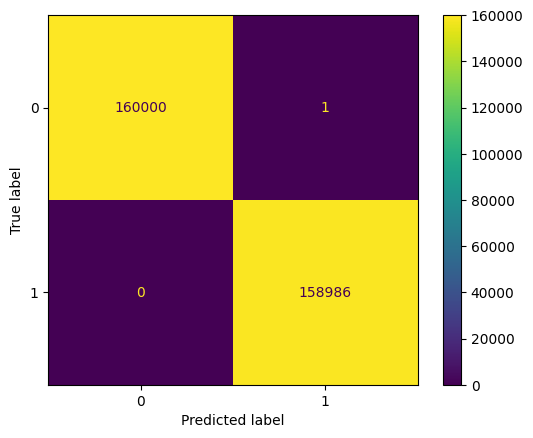

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [38]:
importances = model.named_steps['rf'].feature_importances_
assert len(all_feature_names) == len(importances)

In [39]:
feat_imp = pd.DataFrame(
    {
        'feature' : all_feature_names,
        'importance' : importances
    }
).sort_values(by='importance',ascending=False)

In [37]:
ohe = model.named_steps['p'].named_transformers_['cat']
feature_names = ohe.get_feature_names_out()
all_feature_names = num + list(feature_names)
all_feature_names

['MONTANT',
 'FREQUENCE_RECH',
 'ARPU_SEGMENT',
 'FREQUENCE',
 'DATA_VOLUME',
 'ON_NET',
 'ORANGE',
 'REGULARITY',
 'FREQ_TOP_PACK',
 'REGION_DAKAR',
 'REGION_DIOURBEL',
 'REGION_FATICK',
 'REGION_KAFFRINE',
 'REGION_KAOLACK',
 'REGION_KEDOUGOU',
 'REGION_KOLDA',
 'REGION_LOUGA',
 'REGION_MATAM',
 'REGION_SAINT-LOUIS',
 'REGION_SEDHIOU',
 'REGION_TAMBACOUNDA',
 'REGION_THIES',
 'REGION_ZIGUINCHOR',
 'TENURE_D 3-6 month',
 'TENURE_E 6-9 month',
 'TENURE_F 9-12 month',
 'TENURE_G 12-15 month',
 'TENURE_H 15-18 month',
 'TENURE_I 18-21 month',
 'TENURE_J 21-24 month',
 'TENURE_K > 24 month',
 'MRG_NO',
 'TOP_PACK_1000=Unlimited7Day',
 'TOP_PACK_1500=Unlimited7Day',
 'TOP_PACK_200=Unlimited1Day',
 'TOP_PACK_200F=10mnOnNetValid1H',
 'TOP_PACK_305155009',
 'TOP_PACK_500=Unlimited3Day',
 'TOP_PACK_APANews_weekly',
 'TOP_PACK_All-net 1000=5000;5d',
 'TOP_PACK_All-net 1000F=(3000F On+3000F Off);5d',
 'TOP_PACK_All-net 300=600;2d',
 'TOP_PACK_All-net 5000= 20000off+20000on;30d',
 'TOP_PACK_All-n

In [40]:
len(importances), len(all_feature_names)

(133, 133)

<Axes: xlabel='importance', ylabel='feature'>

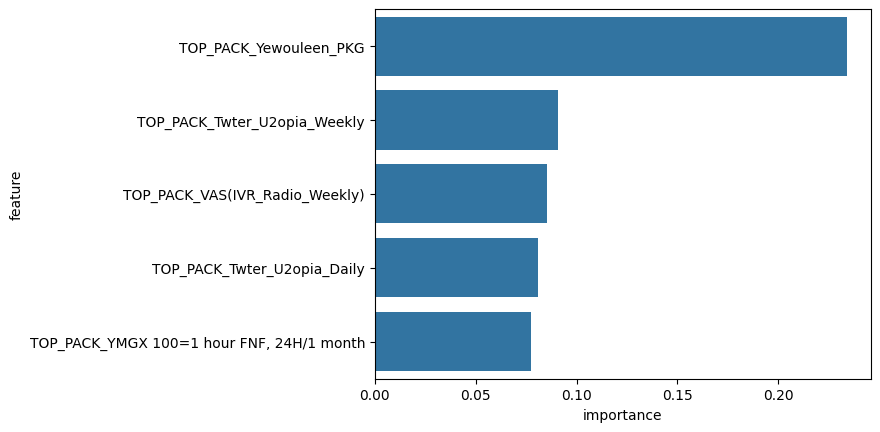

In [41]:
sns.barplot(feat_imp.head(),x='importance',y='feature')

In [48]:
with open('expresso_churn.pkl','wb') as f:
    joblib.dump(model,f)

In [52]:
X_train.head()

,REGION,TENURE,MONTANT,FREQUENCE_RECH,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
672091,DAKAR,K > 24 month,4000.0,3.0,1567.0,8.0,0.0,22.0,109.0,NO,10,All-net 500F=2000F;5d,3.0
1043685,DAKAR,K > 24 month,1600.0,10.0,605.0,19.0,0.0,3.0,8.0,NO,17,"Data:200F=Unlimited,24H",1.0
521249,DIOURBEL,K > 24 month,2000.0,2.0,662.0,3.0,4061.0,8.0,2.0,NO,60,"Data:1000F=2GB,30d",2.0
682797,KAOLACK,K > 24 month,1000.0,2.0,327.0,5.0,10.0,6.0,11.0,NO,10,All-net 500F=2000F;5d,1.0
759455,KAOLACK,K > 24 month,1600.0,4.0,533.0,5.0,0.0,37.0,37.0,NO,23,MIXT:500F= 2500F on net _2500F off net;2d,2.0


In [72]:
X_train['FREQ_TOP_PACK'].max()

np.float64(120.0)

In [47]:
X_train.to_csv('X_train.csv',index=False)

In [43]:
y_train

672091     1
1043685    1
521249     0
682797     1
759455     1
          ..
222339     0
882485     1
328599     0
570508     1
431909     0
Name: CHURN, Length: 744301, dtype: int64

In [44]:
y_test

597756     1
518775     0
266026     0
329571     0
386467     0
          ..
1025657    1
597856     1
876138     1
443723     0
594513     1
Name: CHURN, Length: 318987, dtype: int64

In [45]:
X_train['TOP_PACK'].nunique()

101